In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series,DataFrame

In [93]:
# 1. 数据采集 
# 2. 缺失值
# 3. 采样率（样本比例） 过采样：正样本的个数【远远】大于负样本
#                       欠采样：负样本个数【远远】大于正样本
# 4. 特征提取（选择有效，经验选择）
# 5. 特征选择（算法去计算孰优孰劣） 
# 6. 查看数据类型（LabelEcoder\OneHoteEncoder\map）
# 7. 无量纲化处理（区间缩放、归一化、标准化）【必须的】

In [94]:
student = pd.read_csv('./data/student-data.csv')

In [95]:
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,5,4,2,1,2,5,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,4,4,1,1,3,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,1,1,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,4,2,2,1,1,1,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,yes,no,5,5,1,1,1,5,yes


In [96]:
# 参加考试的学生有多少？？
# 查看结果显示 没有重复的数据
student.duplicated().sum()

0

In [97]:
# 获取参加考试的人数
count = student.shape[0]

In [98]:
# 参加考试的学生男女是多少？？
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,yes


In [99]:
data = student["sex"].value_counts()

In [100]:
data

F    208
M    187
Name: sex, dtype: int64

<Container object of 2 artists>

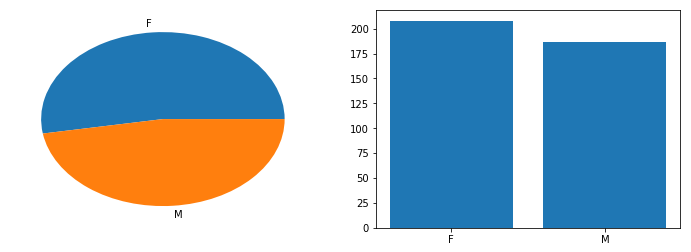

In [101]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax1.pie(data,labels=["F","M"])


ax2 = plt.subplot(1,2,2)
ax2.bar(data.index, data.values)

In [102]:
# 参加考试的学生，通过率是多少？？？
student["passed"].unique()

array(['no', 'yes'], dtype=object)

In [103]:
student["passed"].value_counts()["yes"]/student.shape[0]

0.6708860759493671

In [104]:
student["passed"].value_counts().sum()

395

In [105]:
# 查看数据是否有缺失值
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [106]:
# 特征提取
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,yes


In [107]:
# 根据经验，sex, age对结果没有影响
student.drop(labels=["sex","age"],axis=1,inplace=True)

In [108]:
student.head()

,school,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,GP,U,GT3,A,4,4,at_home,teacher,course,mother,...,yes,no,no,4,3,4,1,1,3,no
1,GP,U,GT3,T,1,1,at_home,other,course,father,...,yes,yes,no,5,3,3,1,1,3,no
2,GP,U,LE3,T,1,1,at_home,other,other,mother,...,yes,yes,no,4,3,2,2,3,3,yes
3,GP,U,GT3,T,4,2,health,services,home,mother,...,yes,yes,yes,3,2,2,1,1,5,yes
4,GP,U,GT3,T,3,3,other,other,home,father,...,yes,no,no,4,3,2,1,2,5,yes


In [109]:
# 数据是否需要整合，比如一些名词描述含义一样，但是表达方式不同
for column in student.columns:
    print(student[column].dtype,column, student[column].unique())

object school ['GP' 'MS']
object address ['U' 'R']
object famsize ['GT3' 'LE3']
object Pstatus ['A' 'T']
int64 Medu [4 1 3 2 0]
int64 Fedu [4 1 2 3 0]
object Mjob ['at_home' 'health' 'other' 'services' 'teacher']
object Fjob ['teacher' 'other' 'services' 'health' 'at_home']
object reason ['course' 'other' 'home' 'reputation']
object guardian ['mother' 'father' 'other']
int64 traveltime [2 1 3 4]
int64 studytime [2 3 1 4]
int64 failures [0 3 2 1]
object schoolsup ['yes' 'no']
object famsup ['no' 'yes']
object paid ['no' 'yes']
object activities ['no' 'yes']
object nursery ['yes' 'no']
object higher ['yes' 'no']
object internet ['no' 'yes']
object romantic ['no' 'yes']
int64 famrel [4 5 3 1 2]
int64 freetime [3 2 4 1 5]
int64 goout [4 3 2 1 5]
int64 Dalc [1 2 5 3 4]
int64 Walc [1 3 2 4 5]
int64 health [3 5 1 2 4]
object passed ['no' 'yes']


In [110]:
# 数值编码
# 1. 有序
# 2. 无序
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [111]:
# 1. 手动添加有序的列
# school  GP普通学校  MS重点学校 所以映射处理成 GP=0  MS=1
map_dic = {
    "GP":0,
    "MS":1
}

student.loc[:,"school"] = student["school"].map(map_dic)

In [112]:
student.head()

,school,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,0,U,GT3,A,4,4,at_home,teacher,course,mother,...,yes,no,no,4,3,4,1,1,3,no
1,0,U,GT3,T,1,1,at_home,other,course,father,...,yes,yes,no,5,3,3,1,1,3,no
2,0,U,LE3,T,1,1,at_home,other,other,mother,...,yes,yes,no,4,3,2,2,3,3,yes
3,0,U,GT3,T,4,2,health,services,home,mother,...,yes,yes,yes,3,2,2,1,1,5,yes
4,0,U,GT3,T,3,3,other,other,home,father,...,yes,no,no,4,3,2,1,2,5,yes


In [113]:
labelencoder =LabelEncoder().fit_transform(student["address"]).reshape(-1,1)

In [114]:
# 2. 按照独热编码处理
# 经过分析，第二列数据不存在序的关系，所以使用独热编码消除有序性
address_data = OneHotEncoder(categories='auto').fit_transform(labelencoder)

In [115]:
student

,school,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,0,U,GT3,A,4,4,at_home,teacher,course,mother,...,yes,no,no,4,3,4,1,1,3,no
1,0,U,GT3,T,1,1,at_home,other,course,father,...,yes,yes,no,5,3,3,1,1,3,no
2,0,U,LE3,T,1,1,at_home,other,other,mother,...,yes,yes,no,4,3,2,2,3,3,yes
3,0,U,GT3,T,4,2,health,services,home,mother,...,yes,yes,yes,3,2,2,1,1,5,yes
4,0,U,GT3,T,3,3,other,other,home,father,...,yes,no,no,4,3,2,1,2,5,yes
5,0,U,LE3,T,4,3,services,other,reputation,mother,...,yes,yes,no,5,4,2,1,2,5,yes
6,0,U,LE3,T,2,2,other,other,home,mother,...,yes,yes,no,4,4,4,1,1,3,yes
7,0,U,GT3,A,4,4,other,teacher,home,mother,...,yes,no,no,4,1,4,1,1,1,no
8,0,U,LE3,A,3,2,services,other,home,mother,...,yes,yes,no,4,2,2,1,1,1,yes
9,0,U,GT3,T,3,4,other,other,home,mother,...,yes,yes,no,5,5,1,1,1,5,yes


In [116]:
# 查看转换后的数据，由一列变成两列
address_data.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [117]:
# 把两列新数据封装成一个DataFrame对象，目的是和总表做级联
addr = DataFrame(data=address_data.toarray(),columns=["address1","address2"])

In [118]:
# 把地址的两列数据与总表级联并把原始的address列删除
student = pd.concat((addr, student), axis=1).drop("address",axis=1)

In [119]:
student.head()

,address1,address2,school,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,0.0,1.0,0,GT3,A,4,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,1,3,no
1,0.0,1.0,0,GT3,T,1,1,at_home,other,course,...,yes,yes,no,5,3,3,1,1,3,no
2,0.0,1.0,0,LE3,T,1,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,3,yes
3,0.0,1.0,0,GT3,T,4,2,health,services,home,...,yes,yes,yes,3,2,2,1,1,5,yes
4,0.0,1.0,0,GT3,T,3,3,other,other,home,...,yes,no,no,4,3,2,1,2,5,yes


In [120]:
# 转换其他列，直接使用LabelEncoder转换
for column in student.columns:
    if student[column].dtype == "object":
        student.loc[:,column] = LabelEncoder().fit_transform(student[column])

In [121]:
student.dtypes

address1      float64
address2      float64
school          int64
famsize         int32
Pstatus         int32
Medu            int64
Fedu            int64
Mjob            int32
Fjob            int32
reason          int32
guardian        int32
traveltime      int64
studytime       int64
failures        int64
schoolsup       int32
famsup          int32
paid            int32
activities      int32
nursery         int32
higher          int32
internet        int32
romantic        int32
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
passed          int32
dtype: object

In [122]:
# 无量纲化处理
from sklearn.preprocessing import MinMaxScaler
student_values = MinMaxScaler().fit_transform(student)

In [123]:
student_values.shape

(395, 29)

In [90]:
# 使用梯度提升数来选择重要特征
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

In [1]:
samples = DataFrame(data=student_values, columns=student.columns)
samples.head()

NameError: name 'DataFrame' is not defined

In [126]:
train = samples.iloc[:,:-1]
target = samples.iloc[:,-1]

In [127]:
train.head()

,address1,address2,school,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,0.0,1.0,0.0,0.0,0.0,1.00,1.00,0.00,1.00,0.000000,...,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5
1,0.0,1.0,0.0,0.0,1.0,0.25,0.25,0.00,0.50,0.000000,...,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5
2,0.0,1.0,0.0,1.0,1.0,0.25,0.25,0.00,0.50,0.666667,...,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5
3,0.0,1.0,0.0,0.0,1.0,1.00,0.50,0.25,0.75,0.333333,...,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0
4,0.0,1.0,0.0,0.0,1.0,0.75,0.75,0.50,0.50,0.333333,...,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0


In [146]:
train.shape

(395, 28)

In [128]:
target

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      1.0
9      1.0
10     0.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     0.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     0.0
25     0.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
365    1.0
366    1.0
367    0.0
368    1.0
369    1.0
370    0.0
371    1.0
372    1.0
373    0.0
374    1.0
375    1.0
376    1.0
377    1.0
378    1.0
379    1.0
380    1.0
381    0.0
382    1.0
383    0.0
384    0.0
385    1.0
386    0.0
387    0.0
388    0.0
389    0.0
390    0.0
391    1.0
392    0.0
393    1.0
394    0.0
Name: passed, Length: 395, dtype: float64

In [135]:
gbdt = GradientBoostingClassifier()
select_model = SelectFromModel(estimator=gbdt).fit_transform(train, target)

In [143]:
gbdt.fit(train, target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [148]:
train.columns

Index(['address1', 'address2', 'school', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health'],
      dtype='object')

In [147]:
gbdt.feature_importances_

array([0.00494611, 0.00764257, 0.00219273, 0.01193284, 0.01334589,
       0.03991445, 0.03206071, 0.06886093, 0.04135798, 0.03089391,
       0.04999036, 0.02185414, 0.05611222, 0.20176932, 0.03432099,
       0.01424726, 0.00858863, 0.02040596, 0.0215126 , 0.02286303,
       0.00785275, 0.01864535, 0.03501162, 0.06842745, 0.06071386,
       0.01166132, 0.05325331, 0.03962171])

In [160]:
df = DataFrame(data = {
    "feature_importances":gbdt.feature_importances_,
    "columns_labels":train.columns
})

In [161]:
df.sort_values("feature_importances",ascending=False, inplace=True)

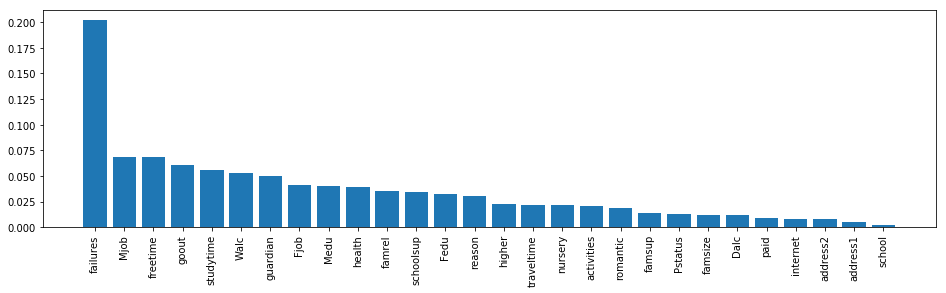

In [162]:
plt.figure(figsize=(16,4))
ax = plt.subplot(111)
ax.bar(np.arange(28), df.feature_importances)
_ = ax.set_xticks(np.arange(28))
_ = ax.set_xticklabels(labels=df.columns_labels, rotation=90)

In [167]:
# 我们选出10个特征
good_features = df.columns_labels[:10].values

In [168]:
good_train = train[good_features]
good_train.head()

,failures,Mjob,freetime,goout,studytime,Walc,guardian,Fjob,Medu,health
0,0.0,0.00,0.50,0.75,0.333333,0.00,0.5,1.00,1.00,0.5
1,0.0,0.00,0.50,0.50,0.333333,0.00,0.0,0.50,0.25,0.5
2,1.0,0.00,0.50,0.25,0.333333,0.50,0.5,0.50,0.25,0.5
3,0.0,0.25,0.25,0.25,0.666667,0.00,0.5,0.75,1.00,1.0
4,0.0,0.50,0.50,0.25,0.333333,0.25,0.0,0.50,0.75,1.0


In [169]:
good_train.shape

(395, 10)

In [ ]:
# 模型选择
# KNN\Logistic\SVM

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [171]:
from sklearn.model_selection import train_test_split

In [173]:
# 使用准确率来查看一个算法的评分情况
def cross_val_score(estimator,train,target,times=10):
    scores = []
    for i in range(times):
        X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)
        estimator.fit(X_train, y_train)
        score = estimator.score(X_test, y_test)
        scores.append(score)
    return np.array(scores)

In [185]:
def show_result(model):
    knn_res = cross_val_score(model, good_train, target)
    print("{}: max{},min{},mean{}, std{}".format(model.__class__.__name__, knn_res.max(), knn_res.min(),knn_res.mean(),knn_res.std()))
    return np.array([model.__class__.__name__, knn_res.max(), knn_res.min(), knn_res.mean(), knn_res.std()])

In [186]:
knn_res = show_result(KNeighborsClassifier())

KNeighborsClassifier: max0.7088607594936709,min0.6075949367088608,mean0.6670886075949367, std0.02944228696104558


In [187]:
lr_res = show_result(LogisticRegression(solver='lbfgs'))

LogisticRegression: max0.8227848101265823,min0.6708860759493671,mean0.7316455696202532, std0.04228681794554449


In [189]:
svc_res = show_result(SVC(gamma="scale"))

SVC: max0.7848101265822784,min0.6708860759493671,mean0.7265822784810128, std0.03589227057913373


In [190]:
svc_res

array(['SVC', '0.7848101265822784', '0.6708860759493671',
       '0.7265822784810128', '0.03589227057913373'], dtype='<U19')

In [195]:
res_data = np.concatenate((lr_res.reshape(-1,1), svc_res.reshape(-1,1), knn_res.reshape(-1,1)), axis=1)

In [205]:
df = DataFrame(res_data, index=["model_name","max","min","mean","std"]).stack().unstack(level=0).set_index("model_name")

In [208]:
df

,max,min,mean,std
model_name,,,,
LogisticRegression,0.8227848101265823,0.6708860759493671,0.7316455696202532,0.04228681794554449
SVC,0.7848101265822784,0.6708860759493671,0.7265822784810128,0.03589227057913373
KNeighborsClassifier,0.7088607594936709,0.6075949367088608,0.6670886075949367,0.02944228696104558


In [214]:
for column in df.columns:
    df.loc[:,column] = pd.to_numeric(df[column])

In [215]:
df.dtypes

max     float64
min     float64
mean    float64
std     float64
dtype: object

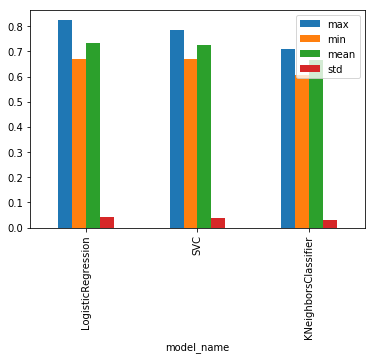

In [216]:
df.plot(kind="bar")

In [217]:
good_train.shape

(395, 10)

In [218]:
np.sqrt(395)

19.87460691435179

In [219]:
# 使用KNN模型进行调参
k_list = np.arange(3,25,step=2)

X_train ,X_test, y_train, y_test = train_test_split(good_train, target, test_size=0.2, random_state=2)
train_scores = []
test_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train, y_train))

Text(4,0.8,'best k value')

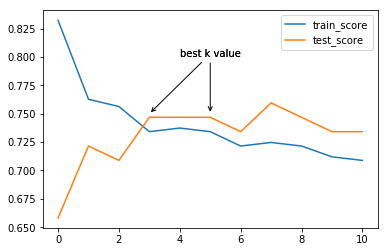

In [222]:
plt.plot(train_scores, label="train_score")
plt.plot(test_scores, label="test_score")
plt.legend()
plt.annotate(s="best k value", xy=[3,0.75], xytext=[4,0.8], arrowprops={
    "arrowstyle":"->"
})
plt.annotate(s="best k value", xy=[5,0.75], xytext=[4,0.8], arrowprops={
    "arrowstyle":"->"
})

In [223]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(good_train, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')